# Logistic regression
In this chapter you will delve into the details of logistic regression. You'll learn all about regularization and how to interpret model output.

# 1. Logistic regression and regularization
### 1.1 Regularized logistic regression
In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we'll explore the effect of L2 regularization.

The handwritten digits dataset is already loaded, split, and stored in the variables `X_train`, `y_train`, `X_valid`, and `y_valid`. The variables `train_errs` and `valid_errs` are already initialized as empty lists.

### Instructions:
* Loop over the different values of `C_value`, creating and fitting a `LogisticRegression` model each time.
* Save the error on the training set and the validation set for each model.
* Create a plot of the training and testing error as a function of the regularization parameter, `C`.
* Looking at the plot, what's the best value of `C`?

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target, random_state=1)

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

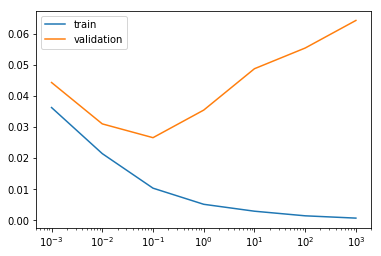

In [2]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

As you can see, too much regularization (small `C`) doesn't work well - due to underfitting - and too little regularization (large `C`) doesn't work well either - due to overfitting.

### 1.2 Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in `X_train` and `y_train`.

We'll search for the best value of `C` using scikit-learn's `GridSearchCV()`, which was covered in the prerequisite course.

### Instructions:
* Instantiate a logistic regression object that uses L1 regularization.
* Find the value of `C` that minimizes cross-validation error.
* Print out the number of selected features for this value of `C`.

In [3]:
from sklearn.datasets import load_svmlight_files
DATADIR="_datasets/"
X_train, y_train, X_valid, y_valid = load_svmlight_files((DATADIR+"reviews_train_smaller_pm1.txt", 
                                                          DATADIR+"reviews_test_smaller_pm1.txt"))

from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression

# make dataset even smaller for speed
n = 5000
X_train = X_train[:n]
y_train = y_train[:n]
X_valid = X_valid[:n]
y_valid = y_valid[:n]

In [4]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]}, cv=3) # specify cv to fix warning
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'C': 1}


In [5]:
# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Total number of features: 2500
Number of selected features: 1220


### 1.3 Identifying the most positive and negative words
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable `lr`.

In addition, the words corresponding to the different features are loaded into the variable `vocab`. For example, since `vocab[100]` is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

### Instructions:
* Find the words corresponding to the 5 largest coefficients.
* Find the words corresponding to the 5 smallest coefficients.

In [6]:
from sklearn.datasets import load_svmlight_file
DATADIR="_datasets/"
X_train, y_train = load_svmlight_file(DATADIR+"reviews_train_smaller_pm1.txt")

n = 5000
X_train = X_train[:n]
y_train = y_train[:n]

import urllib.request
import numpy as np

with open('_datasets/reviews_vocab.txt') as f:
    vocab = f.read().splitlines()
vocab = np.array(vocab)

from sklearn.linear_model import LogisticRegression

# Fit the model
lr = LogisticRegression(solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# Get the indices of the sorted coefficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most positive words: favorite, superb, noir, knowing, loved, 

Most negative words: disappointing, waste, worst, boring, lame, 



# 2. Logistic regression and probabilities
### 2.1 Getting class probabilities
Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?

<img src="_datasets/multiple_choice_proba_transform.png">

### Possible Answers:
(1)
(2)
(3)
(4)

### Answer:
The function in the picture is fairly similar to the logistic function used by logistic regression. (3)

### 2.2 Regularization and probabilities
In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.

A 2D binary classification dataset is already loaded into the environment as `X` and `y`.

### Instructions:
* Compute the maximum predicted probability.
* Run the provided code and take a look at the plot.
* Create a model with C=0.1 and examine how the plot and probabilities change.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sys
from plot_classifier import *
%matplotlib inline

# generate synthetic data with fixed random seed
np.random.seed(3)
N = 20
X = np.random.randn(N,2)
y = np.random.choice((-1,+1),size=N)
X[y>0,0] -= 3
X[y>0,1] += 3

Maximum predicted probability 0.9761229966765974


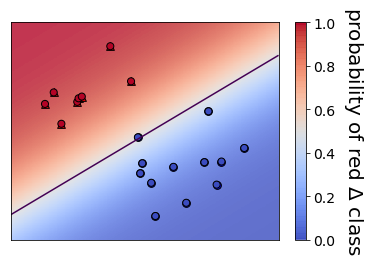

In [9]:
# Set the regularization strength
model = LogisticRegression(C=1, solver='liblinear') # specified solver to fix warning

# Fit and plot
model.fit(X, y)
plot_classifier(X, y, model, proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Maximum predicted probability 0.8990965659596716


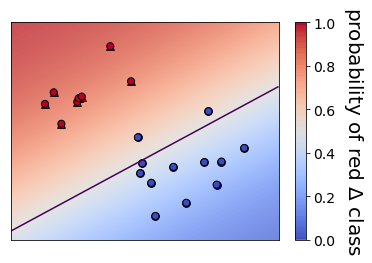

In [10]:
# Set the regularization strength
model = LogisticRegression(C=0.1, solver='liblinear') # specified solver to fix warning

# Fit and plot
model.fit(X,y)
plot_classifier(X, y, model, proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

As you probably noticed, smaller values of `C` lead to less confident predictions. That's because smaller `C` means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function. That's quite a chain of events!

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits() 
X, y = digits.data, digits.target

def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin = 0, vmax = 16, interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title("class label = %d" % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_prob = lr.predict_proba(X[i][None])[0,pred]
        plt.title("label=%d, prediction=%d, proba=%.2f" % (y[i], pred, pred_prob))
    plt.show()

### 2.3 Visualizing easy and difficult examples
In this exercise, you'll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

The handwritten digits dataset is already loaded into the variables `X` and `y`. The `show_digit` function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.

### Instructions
* Fill in the first blank with the _index_ of the digit that the model is most confident about.
* Fill in the second blank with the _index_ of the digit that the model is least confident about.
* Observe the images: do you agree that the first one is less ambiguous than the second?

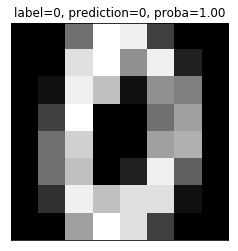

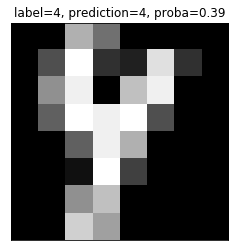

In [12]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

As you can see, the least confident example looks like a weird 4, and the most confident example looks like a very typical 0.

# 3. Multi-class logistic regression
### 3.1 Counting the coefficients
If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts?
###### Possible Answers
1. 101
2. 103
3. 301
4. 303

<div align=right>Answer: (4)</div>

### 3.2 Fitting multi-class logistic regression
In this exercise, you'll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into `X_train`, `y_train`, `X_test`, and `y_test`.

### Instructions:
* Fit a one-vs-rest logistic regression classifier and report the results.
* Fit a softmax logistic regression classifier by setting the `multiclass` paramater, plus setting to be `solver = "lbfgs"`, and report the results.

In [13]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

In [14]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(solver='liblinear', multi_class='ovr') # specified solver and multi_class to fix warning
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

OVR training accuracy: 0.9948032665181886
OVR test accuracy    : 0.9644444444444444


In [15]:
# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9688888888888889


C:\Python37\Mikele\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


As you can see, the accuracies of the two methods are fairly similar on this data set.

### 3.3 Visualizing multi-class logistic regression
In this exercise we'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme.

The data set is loaded into `X_train` and `y_train`. The two logistic regression objects, `lr_mn` and `lr_ovr`, are already instantiated (with `C=100`), fit, and plotted.

Notice that `lr_ovr` never predicts the dark blue class... yikes! Let's explore why this happens by plotting one of the binary classifiers that it's using behind the scenes.

### Instructions:
* Create a new logistic regression object (also with `C=100`) to be used for binary classification.
* Visualize this binary classifier with `plot_classifier`... does it look reasonable?

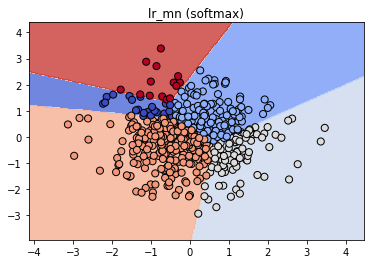

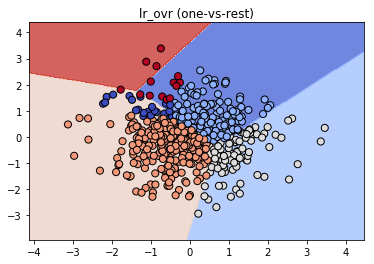

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from plot_classifier import *

with open("_datasets/multiData.npz", "rb") as f:
    loaded_data = np.load(f)
    X_train = loaded_data['X']
    y_train = loaded_data['y']
    X_test = loaded_data['Xvalid']
    y_test = loaded_data['yvalid']

lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=100)
lr_mn.fit(X_train, y_train)

fig = plt.figure()
plt.title("lr_mn (softmax)")
plot_classifier(X_train, y_train, lr_mn, ax=fig.gca(), ticks=True)
plt.show()

lr_ovr = LogisticRegression(C=100, solver='liblinear', multi_class='ovr')
lr_ovr.fit(X_train, y_train)

fig = plt.figure()
plt.title("lr_ovr (one-vs-rest)")
plot_classifier(X_train, y_train, lr_ovr, ax=fig.gca(), ticks=True)
plt.show()

Softmax     training accuracy: 0.996
One-vs-rest training accuracy: 0.916


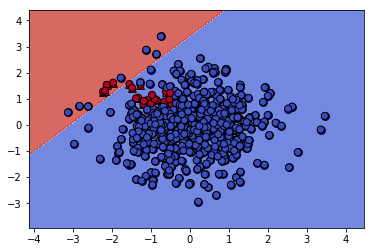

In [17]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100, solver='liblinear')
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1, ticks=True)

As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

### 3.4 One-vs-rest SVM
As motivation for the next and final chapter on support vector machines, we'll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into `X_train`, `y_train`, `X_test`, and `y_test`.

Instead of using `LinearSVC`, we'll now use scikit-learn's `SVC` object, which is a non-linear "kernel" SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.

### Instructions:
* Fit an `SVC` called `svm_class_1` to predict class 1 vs. other classes.
* Plot this classifier.

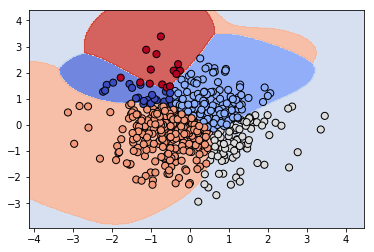

In [18]:
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from plot_classifier import *

with open("_datasets/multiData.npz", "rb") as f:
    loaded_data = np.load(f)
    X_train = loaded_data['X']
    y_train = loaded_data['y']
    X_test = loaded_data['Xvalid']
    y_test = loaded_data['yvalid']

# Compute train/validation accuracies
#print("SVM training accuracy:", svm_ovr.score(X_train, y_train))
#print("SVM test accuracy    :", svm_ovr.score(X_test, y_test))

from sklearn.svm import SVC
# Instantiate the non-linear SVM, force it to use one-vs-rest
svm_ovr = OneVsRestClassifier(SVC())

# Fit and plot
svm_ovr.fit(X_train, y_train)
plot_classifier(X_train, y_train, svm_ovr, ticks=True)

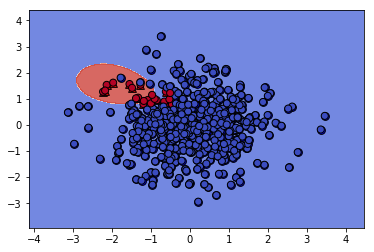

In [19]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1, ticks=True)

The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.